<h1> Texas "Gun Control" Tweets: Word Cloud and Sentiment Analysis

<h5> In this notebook we explore Huston,Texas "Gun Control" Tweets and generate visualizations in the form of a word cloud and bar chart of the sentiment analysis. This is to explore the discourse of people online and discern their feelings and language toward the topic of gun control.
    
By Stacy Carlos

here I import the libraries we commonly use pandas, numpy, plotly, osmnx, and matplot. however, we need additional libraries to get the tweets, to conduct a sentiment analysis, and create a word cloud. these are tweepy, textblob, and wordcloud(and stopwords). 

In [68]:
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox
import matplotlib.pyplot as plt
import tweepy as tw
from textblob import TextBlob
import re
from wordcloud import WordCloud, STOPWORDS

to access the twitter data i know enter my designated twitter keys, secrets, and tokens.

In [69]:
consumer_key= 'ty2GnPuGohxxB5pW3GNcJcFS9'
consumer_secret= 'wrPxNQR2VAPdaMBW0Vx170FAOyOxacYuenWEDop7755kxZcQcE'
access_token= '949867966832762880-Prkgcaa3zpTS6JKVm1yO0rECilOWZFy'
access_token_secret= 'V8JINe49YIGi61NtHdDyWbSRkUu3qbSdJjlcYnhsfjUhF'

there I am authenticating myself with twitter 

In [70]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

now I am going to conduct a query within twitter for the searchterm "gun control." I also create the variable q to filter out any retweets, and then make another variable called max_tweets to state how many I want to retrieve. finally I create a query method with the arguments I want included.

In [71]:
searchterm = 'gun control'
q = searchterm + " -filter:retweets"
max_tweets = 500
tweets = tw.Cursor(api.search,
                   q=q, 
                   tweet_mode='extended').items(max_tweets)

then by using a for loop I can access each index/tweet and have them print as it runs

In [72]:
for index, tweet in enumerate(tweets):
    print(index, tweet.full_text)

0 @HyruleFieldFan While they may have strict gun control laws now, I consider that a byproduct of other factors that lead up to it, most primarily being that people willingly chose this, with a culture that supports peacekeeping and good faith practices.
1 Don't claim to be "anti-fascist" if you are wanting to implement fascist policies like Censorship and Gun Control. https://t.co/FFxK2lp2Ql
2 Here are just a few companies that support gun control measures and Patriots must boycott and push back against flat out communism: Panera Bread, Burger King, Subway, Sonic, KFC, Pizza Hut, Taco Bell, Coca Cola, and Chipotle. I know, but we MUST break them and this is how.
3 Biden considers regulating ghost guns in first move on gun control https://t.co/wlk1Mge2J9 via @MailOnline
4 In 1931, the Weimar government authorized the registration of all firearms and the confiscation thereof, if required for "public safety." In 1933, the Nazis used the records to identify, disarm, and attack political o

now I am going to search for my search term "gun control" within a certain area. to do that i add have to add arguments specifying the cordinates and spance.

In [73]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='29.766083,-95.358810,50km', 
                   tweet_mode='extended').items(max_tweets)

using another for loop I will go through each tweet and print them along with the information of when they were created

In [74]:
for index, tweet in enumerate(tweets):
    print(str(tweet.created_at) + ': ' + tweet.full_text)

2021-02-24 03:15:50: @Major_Hutch @ksorbs But most crimes and mass murders are committed with handguns. I thought the plan was to lower that? Why only allow the weapon most used in those acts? Oh that’s right, gun control is not about saving lives just tricking the uneducated into thinking it is
2021-02-24 00:29:52: @NewtownAction Gun control is unconstitutional.
2021-02-24 00:27:29: @JohnFeinblatt @Everytown Gun control is unconstitutional.
2021-02-23 17:52:40: Biden Gun Control Plan Would ‘Criminalize’ up to 105 Million People: Gun-rights Group

https://t.co/F2awZ2XFJl
2021-02-23 17:14:43: Biden Gun Control Plan Would ‘Criminalize’ up to 105 Million People: Gun-rights Group

https://t.co/WOWs8lfAIP
2021-02-23 16:53:20: @nicoleshodges @BetoORourke He’s not a Senator ....He’s a wannabe gun control nut
2021-02-23 16:51:59: These Are the Roughly 200 Businesses Whose Leaders Are Backing Gun Control Initiatives https://t.co/n6KpZbNxX4
2021-02-23 16:14:04: A Hypocritical Biden “Virtue Signa

now I search twitter again because for some reason the item iterator returned by the tw.Cursor fun can only run one loop operation

In [75]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='34.068921,-118.4473751,50km', 
                   tweet_mode='extended').items(max_tweets)

When printing the tweets we can see that it is in json format so we have to convert it into a dataframe that is more accessible. as seen and don in the next two cells.

In [76]:
print(tweets)

In [77]:
json_data = [tweet._json for tweet in tweets]

here I create a variable that will contain the normalized dataframe

In [78]:
df = pd.json_normalize(json_data)
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,place.place_type,place.name,place.full_name,place.country_code,place.country,place.contained_within,place.bounding_box.type,place.bounding_box.coordinates,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str
0,Wed Feb 24 05:35:35 +0000 2021,1364448868553814024,1364448868553814024,Comments:\n• Air Brigadier General Robert Spalding: Biden following CCP agenda\n• Snopes made by Soros to serve left\n• Lifesite's Covid-19 conference\n• Vatican leads the way in vaccine tyranny\n• A little history on gun control &amp; oppressive governments\nhttps://t.co/vYnydbPpn6 https://t.co/X4HIFITgzz,False,"[0, 277]","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Feb 23 22:44:54 +0000 2021,1364345518571233283,1364345518571233283,"@lionel_trolling certainly makes David Hogg's evolution from ""gun control now"" to ""I'm making a liberal pillow company to own the conservative pillow guy"" more understandable",False,"[17, 174]","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",1.364344e+18,1364344433190334471,3.441358e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tue Feb 23 20:42:41 +0000 2021,1364314763010875393,1364314763010875393,"@JonJay1us @gscucci Gun control and gun rights are different things. One does not negate the other. Sensible gun laws help soceity. Don't worry 'Charelton Heston'. If you are intimating Trump was for guns, you are wrong. He only said it b/c it was trigger for his minions. You prove my point",False,"[20, 291]","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",1.364313e+18,1364313067560067072,3.304570e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tue Feb 23 20:19:31 +0000 2021,1364308930952798209,1364308930952798209,"Lied. Read on. The bio is gossipy + scandelous (not pub. in the UK coz of the libel laws, I think). I’m enjoying hating it. The speed of Cruise’s success is crazy. He went from being spotted by an agent in a school play to having a degree of creative control over Top Gun in 6 yrs https://t.co/AjFnrRpHEl",False,"[0, 280]","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tue Feb 23 19:21:18 +0000 2021,1364294281934987267,1364294281934987267,Biden Gun Control Plan Would ‘Criminalize’ up to 105 Million People: Gun-rights Group https://t.co/82qJ3SRgWa via @epochtimes,False,"[0, 125]","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


now i will look into the fields of the dataframe

In [79]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 162 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   created_at                                             134 non-null    object 
 1   id                                                     134 non-null    int64  
 2   id_str                                                 134 non-null    object 
 3   full_text                                              134 non-null    object 
 4   truncated                                              134 non-null    bool   
 5   display_text_range                                     134 non-null    object 
 6   source                                                 134 non-null    object 
 7   in_reply_to_status_id                                  58 non-null     float64
 8   in_reply_to_status_id_str                        

in order to condense the amount of columns/metadata collected for each tweet. here i trim the columns and rename them.

In [80]:
df = df[['created_at','full_text','user.screen_name','user.profile_image_url_https']]
df.columns = ['created_at','text','screen_name','profile_image']

here I override the default so that the entire text can be seen in the column

In [81]:
pd.set_option('display.max_colwidth', None)

now to check I get a sample 

In [82]:
df.sample(5)

,created_at,text,screen_name,profile_image
84,Thu Feb 18 14:00:02 +0000 2021,How Biden could tighten gun control without Congress - Fox News\nhttps://t.co/CbVUaieuxr,NewsfeedsMedia,https://pbs.twimg.com/profile_images/1007727007520550912/N-2SnA2K_normal.jpg
47,Sun Feb 21 01:50:51 +0000 2021,https://t.co/srHBbPzVQ4,joesegal,https://pbs.twimg.com/profile_images/1249052499941552128/INJ40i9T_normal.jpg
116,Wed Feb 17 01:27:50 +0000 2021,Biden Tells Congress To Start Working On Gun Control Legislation https://t.co/hU38P1MQaE via @YouTube,GrammaJammin,https://pbs.twimg.com/profile_images/1347390634345123842/Ushc6I2-_normal.jpg
64,Sat Feb 20 06:55:54 +0000 2021,gonna go ahead and bet they fixed the issue with gun control https://t.co/ro1b6HS1cQ,unreservist,https://pbs.twimg.com/profile_images/845097288926031872/L6J1cwbi_normal.jpg
81,Thu Feb 18 16:40:20 +0000 2021,Opinion: The Constitution and Supreme Court set a high bar for gun control https://t.co/MROQpHzzST,SGVTribune,https://pbs.twimg.com/profile_images/817474890945040384/IjagBnXi_normal.jpg


<h5> Word Cloud

given that tweets contain emojis and other characters this fuction will clean the tweets using regular expressions

In [83]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

the following is the printed orig. tweet and the cleaned one

In [84]:
tweet = df.sample().text.values[0]
print(tweet)
clean_tweet(tweet)

"The legislation introduced on Tuesday failed to satisfy people on either side of the debate.

Groups calling for gun control were disappointed, for instance, that the buyback program will not be mandatory, as was the case in New Zealand."


'The legislation introduced on Tuesday failed to satisfy people on either side of the debateGroups calling for gun control were disappointed for instance that the buyback program will not be mandatory as was the case in New Zealand'

the following adds the clean text into its own column then use a loop to add the clean tweets into it

In [85]:
df['clean_text'] = ''

In [86]:
for i, row in df.iterrows():
    clean = clean_tweet(row.text)
    df.at[i,'clean_text'] = clean

now I will get a sample to see it the change is made

In [87]:
df.sample(5)[['text','clean_text']]

,text,clean_text
14,The Constitution and Supreme Court set a high bar for gun control https://t.co/Z3a6ABguvJ,The Constitution and Supreme Court set a high bar for gun control
38,"So, three people died over a fight about a gun control law outside a gun store which strongly suggests the law doesn’t go far enough. https://t.co/5PJl9OeZSr",So three people died over a fight about a gun control law outside a gun store which strongly suggests the law doesnt go far enough
22,"If you have 7 minutes to spare on a serious issue, I strongly encourage you to watch this video. \n\nJoe Biden Tells Congress To Ban AR-15s and Enact Other Gun Control to De... https://t.co/YHdPson4rV via @YouTube",If you have 7 minutes to spare on a serious issue I strongly encourage you to watch this video Joe Biden Tells Congress To Ban AR15s and Enact Other Gun Control to De via
121,"My only real input to the gun discourse is that this is a really cool piece by a firearm owning Australian, in which a pretty decent model is explained that I think is worth looking at. Not perfect but a good balance of measures.\n\nhttps://t.co/pSZFMpVC6e",My only real input to the gun discourse is that this is a really cool piece by a firearm owning Australian in which a pretty decent model is explained that I think is worth looking at Not perfect but a good balance of measures
7,Banning so-called ‘assault weapons’ will do nothing to end criminal use of firearms | Letters - Chicago Sun-Times https://t.co/BjiS1balAj,Banning socalled assault weapons will do nothing to end criminal use of firearms Letters Chicago SunTimes


now that the tweets are clean I will creat a variable that will contain all the tweet words from the dataframe. then i print it to see that the variable contains all the words

In [88]:
all_text = ' '.join(df['clean_text'])
all_text

'Comments Air Brigadier General Robert Spalding Biden following CCP agenda Snopes made by Soros to serve left Lifesites Covid19 conference Vatican leads the way in vaccine tyranny A little history on gun control amp oppressive governments trolling certainly makes David Hoggs evolution from gun control now to Im making a liberal pillow company to own the conservative pillow guy more understandable Gun control and gun rights are different things One does not negate the other Sensible gun laws help soceity Dont worry Charelton Heston If you are intimating Trump was for guns you are wrong He only said it bc it was trigger for his minions You prove my point Lied Read on The bio is gossipy scandelous not pub in the UK coz of the libel laws I think Im enjoying hating it The speed of Cruises success is crazy He went from being spotted by an agent in a school play to having a degree of creative control over Top Gun in 6 yrs Biden Gun Control Plan Would Criminalize up to 105 Million People Gunri

nowing that the word cloud library has stop words to help take out filler words from my word cloud (ex:the). I will add my search word to a new list variable that will contain the library's stop words and any I want added to it and not in my cloud. 

In [89]:
stop_words = ['gun'] + ['control']+['thats'] +['will'] +['via']+['guns']+ list(STOPWORDS)

now I will feed it through the word cloud factory to generate the visualization 

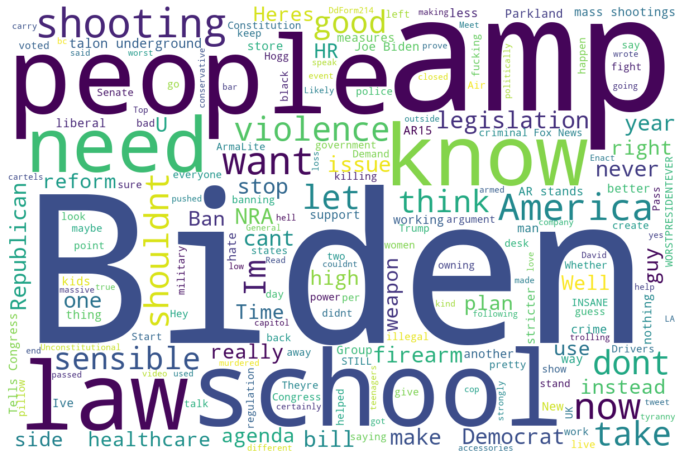

In [90]:
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(all_text)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This word cloud demonstrates a lot that is going on right now with gun coltrol. Specifically with the plans Biden has on the topic of gun control, and as a result of this, there is currently a strong discussion which was interesting given it is a reflection of current politics. I removed a series of words I did not want included in order to clear up the visual. I can notice the mention of laws on the mater some, that i had noticed when looking at the samples expressed the need or distaste of further regulation on guns. The word shouldn't made it to the word cloud but that can go both way of pro or anti gun control. The is a call to knowledge and common sense as well. I am however left wondering the purpose and repetitiveness of amp but I believe it can relate to the phrase amp up, possibly.

<h5> Sentiment Analysis Bar Chart

i am going to add a new column specifically for the polarity value of the tweets

In [91]:
df['polarity']=''

using a for loop I am going to go through every tween and add to the column its polarity value

In [92]:
for i, row in df.iterrows():
    a = TextBlob(row.clean_text)
    df.at[i,'polarity'] = a.polarity

now to check that it happened I am going to get a sample of the last two colums (the clean tweet and the polarity column)

In [93]:
df[['clean_text','polarity']].sample(5)

,clean_text,polarity
35,Well he is representing his constituents not you I hate that he voted for Trumps judges amp sides with Republicans on abortion amp gun control but he also voted to save the ACA Planned Parenthood funding amp against the 2017 Republican Tax Plan Hes far better than a Republican,-0.0666667
20,I have hearing loss from early rock shows but thats outside government control A suppressor costs 500 at the low end Foam ear plugs are 5 Neither will bring back loss Owning disputed gun accessories is about nothing but expressing power No one needs them,0.025
87,If kindergartners get murdered in Sandy Hook didnt prompt gun control m not sure,-0.25
16,MSCHF mounted a remotecontrol paintball gun to Spot,0
79,Last year an average of 36 people were shot in LA per day This year the average is 5 Shootings are out of control and a neverending flow of untraceable firearms that get into the hands of felons amp gang members makes solving these crimes tougher,-0.15


I am now going to assign polarity values positive and negative sentiments, respectively. I will first to create the condition as to what each value would be considered later(on a scale of very neg. to very pos.). then I create a list of values that will be assigned to each condition. Finally, i create the column that will hold each tweets value. the np.select allows me to assign using the list as arguments.

In [94]:
conditions = [
    (df['polarity'] < -0.2),
    (df['polarity'] < 0) & (df['polarity'] >= -0.2),
    (df['polarity'] == 0),
    (df['polarity'] > 0) & (df['polarity'] <= 0.2),
    (df['polarity'] > 0.2)
    ]

values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

df['sentiment'] = np.select(conditions, values)

to check if its updated again I use the sample command again

In [95]:
df.sample(5)[['clean_text','polarity','sentiment']]

,clean_text,polarity,sentiment
63,Heres my theory Theyre going to create a psyop or a type of logical regulation for gun control in the name of safety and CONDITION you to accept it but they scam and fool you into giving up your guns so that you cant fight back against tyranny WakeUp WeThePeople,0.125,positive
131,The ambitious agenda is just another plan Biden and the Democrats are working to take away our rightsWe have to fight back their agenda,0.125,positive
84,How Biden could tighten gun control without Congress Fox News,0,neutral
1,trolling certainly makes David Hoggs evolution from gun control now to Im making a liberal pillow company to own the conservative pillow guy more understandable,0.438095,very positive
6,In high school I wrote an oped for the LA Times high school thing and I wrote about how historically gun control has been used to get poc in jail and how we should focus on getting rid of cops instead the liberals were seething,0.055,positive


here I am selecting 5 colors for each sentiment in my chart

In [96]:
sentiment_colors = ox.plot.get_colors(5, cmap='PiYG', return_hex = True)

now I create the bar chart and add the needed argument as to how I want it built/organized

In [97]:
fig = px.bar(df, 
             x = 'sentiment',
             width = 600,
             title = 'Sentiment analysis for "'+ searchterm + '"',
             color = 'sentiment',
             category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence = sentiment_colors, 
            )

fig.update_traces(marker_line_width=0)
fig.show()

I am surprised by the sentiment distribution. I was expecting more of a difference between them all. I will even admit to my own bias over Texas being a state of strong pro gun opinions, and did not expect this. Maybe this has to do with the location I selected given that i selected a major city of Texas and even zeroed in on the cordinates of the University of Huston. There is more neutral sentiments which I also find surprising given that musch of the twitter discouse people interact with online tend to be extreme in it beliefs/statments. That, however, may attribute to the feed algorithm twitter has in place

I, Stacy, analyzed gun control sentiments for the city of Huston, Texas. My partner, Ainsleigh, analysed gun control sentiments on the city of Chicago, Illinois in order for us to compare them further down the line.